# Assignment 3 Python

# Bank Marketing Data Set

## Import Libraries

Library pada bahasa pemrograman Python berfungsi untuk memudahkan pengguna dalam membuat sebuah program tanpa harus menuliskan banyak kode. Untuk melakukan klasifikasi pada python, dibutuhkan beberapa library. Library tersebut harus diimport terlebih dahulu agar dapat digunakan.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Splitting Data
from sklearn.model_selection import train_test_split

# Standardization
from sklearn.preprocessing import StandardScaler

# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # Accuracy Score
from sklearn.metrics import classification_report, confusion_matrix #Classification Report, Confusion Matrix

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier #Import knearest neighbors Classifier model

# SVM Classifier
from sklearn.svm import SVC

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree # Visualizing Decision Tree
import pydotplus
from six import StringIO 
from IPython.display import Image

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Remove Warnings
import warnings 

Setelah proses import library selesai, maka langkah selanjutnya adalah mengimpor set data yang akan digunakan.

## Import Data


Set data bernama `bank-additional-full.csv` di-import menggunakan fungsi `pd.read_csv` karena file yang digunakan memiliki format `.csv` dan disimpan dalam dataframe bernama `df` , digunakan argumen `sep=';'` karena masing-masing kolom dipisahkan oleh tanda semicolon. 

In [33]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Fungsi `.head()` digunakan untuk melihat sebagian isi dari data. Secara default, fungsi `.head()` akan menampilkan 5 baris teratas dari data.

## Information from Data

Set data merupakan data kampanye pemasaran langsung sebuah Bank di Portugis. Kampanye pemasaran dilakukan melalui telepon. Klien sering kali dihubungi lebih dari satu kali untuk memastikan apakah mereka akan berlangganan produk bank tersebut (deposito bank berjangka).

Informasi mengenai jumlah dan nama kolom, jumlah baris, dan tipe data yang terkandung dalam set data dapat diketahui menggunakan fungsi `.info()`

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Set data memiliki 21 kolom dan 41188 baris. Data type pada setiap kolo dapat diketahui berdasarkan `Dtype`.

Untuk mengetahui nama-nama kolom pada set data, dapat digunakan fungsi `.columns`

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Untuk mengetahui apakah terdapat null-value pada set data, digunakan fungsi `.isna().sum()`.

In [36]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ditemukan null-value pada set data.

Informasi statistik pada data (numerik) dapat ditampilkan menggunakan fungsi `.describe()`.

In [37]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Pre-processing Data

Sebelum dilakukan proses analisis, set data perlu dipersiapkan terlebih dahulu.

Dilakukan proses label encoding untuk memetakan setiap nilai pada set data menjadi sebuah angka. Proses label encoding dilakukan menggunakan `LabelEncoder` yang berasal dari library sklearn. Pada set data, pengaplikasian label encoder dilakukan pada kolom job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, dan y.

In [38]:
# konversi data kategorik menjadi numerik

le = LabelEncoder()
df[['job','marital','education','default','housing',
    'loan','contact','month','day_of_week','poutcome','y']]= df[['job','marital','education','default','housing',
                                                             'loan','contact','month','day_of_week','poutcome','y']].apply(le.fit_transform)


Dilakukan pengecekan pada set data menggunakan fungsi `.head()` untuk menampilkan 5 baris teratas dari data dan fungsi `.info()` untuk menampilkan informasi dari set data.

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Menggunakan fungsi `.info()` dilakukan pengecekan kembali apakah data kategorik telah berubah menjadi data numerik.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data kategorik telah terkonversi menjadi numerik.

## Splitting Data

Dilakukan proses splitting data untuk membagi data menjadi 2 set yaitu training set dan test set. Pembagian data training dan dara testing dilakukan secara acak. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model.

Didefinisikan variabel X sebagai data seluruh kolom kecuali kolom `y`. Nilai variabel X diperoleh menggunakan fungsi `.drop(['y'],axis=1)`, `y` adalah kolom yang tidak digunakan/dihapus, sedangkan `axis=1` akan menghapus keseluruhan kolom. Sedangkan variabel y adalah data dari kolom `y`.

In [41]:
X = df.drop(['y'],axis=1)
y = df[['y']]

Proses splitting data dapat menggunakan fungsi `train_test_split()` dengan rincian:

- X : variabel x
- y : variabel y
- test_size : ukuran test data
- random_state : status pseudo-random number generator

In [42]:
# 70% training set, 30% test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Pada objek `y_train` dan `y_test` digunakan fungsi `.ravel()` untuk mengubah matriks menjadi array.

In [43]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Logistic Regression

Logistic Regression alau regresi logistik adalah suatu pendekatan yang digunakan untuk membuat model prediksi. Regresi logistik mirip dengan regresi linear, akan tetapi terdapat perbedaan pada keduanya yaitu pada variabel dependennya yang besifat dikotomus (dua kriteria: ya dan tidak). Perbedaan lainnya adalah pada regresi logistik tidak dibutuhkan asumsi khusus seperti regresi linear.

### Standardization

Sebelum dilakukan proses analisis, data perlu distandarisasi terlebih dahulu menggunakan `StandardScaler()`. Proses standarisasi data dapat meningkatkan kinerja algortima yang digunakan.

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

Langkah selanjutnya adalah membuat model menggunakan fungsi `LogisticRegression` dengan rincian:

- solver='liblinear' : digunakan solver bernama *liblinear*
- C=0.05 : mendefinisikan kekuatan relatif regularisasi, semakin kecil nilainya, semakin kuat
- multi_class='ovr' : dugunakan ketika regresi yang digunakan adalah regresi logistik biner
- random state=0 : digunakan untuk mengacak data

Fungsi `.fit()` digunakan untuk melatih model.

In [45]:
model_lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
model_lr.fit(X_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

### Model Prediction

Setelah mendapatkan model, maka prediksi dapat didapatkan menggunakan fungsi `.predict()`.

In [46]:
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

### Accuracy

Untuk mengukur tingkat akurasi model, digunakan fungsi `.score()`

In [47]:
print('Accuracy Train Set:', model_lr.score(X_train,y_train))
print('Accuracy Test Set:', model_lr.score(X_test,y_test))

Accuracy Train Set: 0.9102701952759182
Accuracy Test Set: 0.9122764425022255


Berdasarkan hasil tersebut didapatkan:
- Tingkat akurasi model berdasarkan data training sebesar 0.9102701952759182.
- Tingkat akurasi model berdasarkan data testing sebesar 0.9122764425022255,

### Confusion Matrix

Informasi mengenai model dapat juga diperoleh menggunakan matriks konfusi atau confusion matrix. 

Perlu dilakukan import library dengan argumen `from sklearn.metrics import confusion_matrix`. Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()` dengan parameter `y_test` dan `y_pred_test`.

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_lr)
print(cm)

[[10696   273]
 [  811   577]]


Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10696
- False negative (salah memprediksi negatif) : 811
- False postive (salah memprediksi positif) : 273
- True postive (benar memprediksi positif) : 577

### Confusion Matrix Visualization

Untuk memvisualisasikan matriks konfusi dapat menggunakan fungsi `.imshow()` yang berasal dari library matplotlib dengan argumen sebagai berikut.

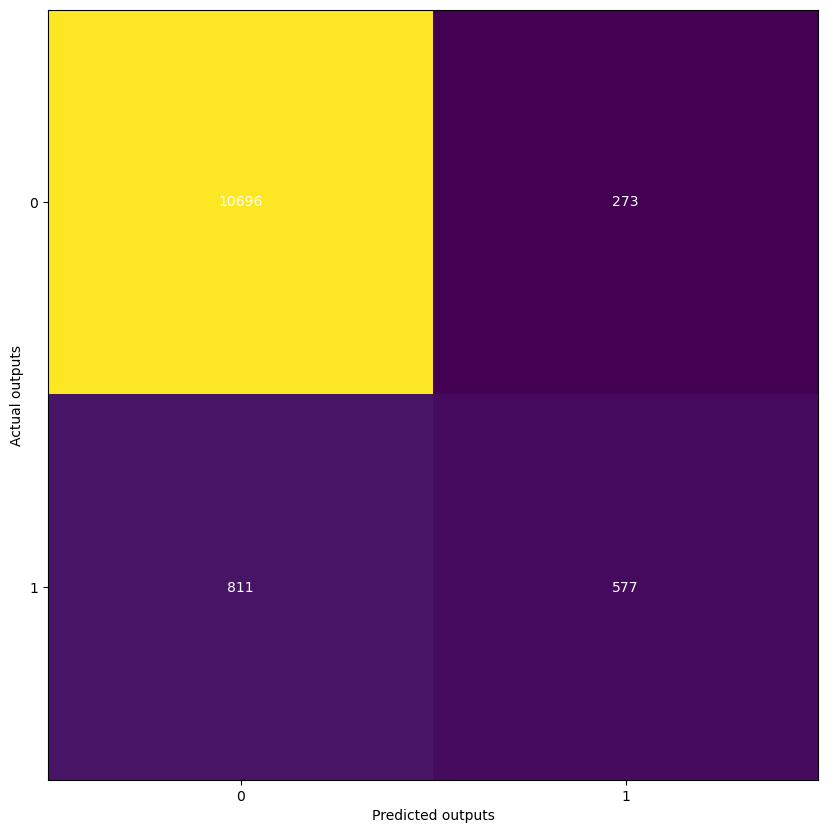

In [49]:
cm = confusion_matrix(y_test,y_pred_test_lr)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10696
- False negative (salah memprediksi negatif) : 811
- False postive (salah memprediksi positif) : 273
- True postive (benar memprediksi positif) : 577

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [50]:
print('Classification Report Train Set: \n',classification_report(y_train,y_pred_train_lr))
print('Classification Report Test Set: \n',classification_report(y_test,y_pred_test_lr))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25579
           1       0.67      0.41      0.51      3252

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Classification Report Test Set: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.42      0.52      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Tingkat akurasi model berdasarkan data training sebesar 0.91, sedangkan tingkat akurasi model berdasarkan data testing juga bernilai 0.91. Maka, model dapat dikategorikan sebagai model well-fit.

## K-Nearest Neighbors

K-Nearest Neighbors atau KNN adalah salah satu algoritma supervised machine learning yang mengklasifikasikan titik data baru ke dalam kelas target tergantung pada fitur titik data tetangganya, K pada KNN adalah banyaknya tetangga/neighbors yang digunakan sebagai dasar dalam klasifikasi. Algoritma KNN mengklasifikasikan titik data berdasarkan seberapa mirip titik tersebut dengan titik data tetangganya.

### Generating Model K = 5

Untuk membangun model KNN, digunakan fungsi `KNeighborsClassifier` dengan argumen `(n_neigbors=5)` yaitu banyaknya tetangga yang digunakan sebesar 5. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data testing menggunakan fungsi `.predict()`.

In [51]:
knn_5 = KNeighborsClassifier(n_neighbors=5) # K = 5
knn_5.fit(X_train,y_train)

y_pred_5 = knn_5.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy Model with K = 5

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [52]:
print('Accuracy:', accuracy_score(y_test,y_pred_5))

Accuracy: 0.9014323865015781


Didapatkan tingkat akurasi model dengan K = 5 sebesar 0.9014323865015781.

### Generating Model K = 9

Ingin diketahui apakah dengan nilai K yang berbeda tingkat akurasi akan meningkat. Digunakan fungsi `KNeighborsClassifier` dengan argumen `(n_neigbors=9)` yaitu banyaknya tetangga yang digunakan sebesar 9. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data testing menggunakan fungsi `.predict()`.

In [53]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train,y_train)

y_pred_9 = knn_9.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy Model with K = 9

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [54]:
print('Accuracy:', accuracy_score(y_test,y_pred_9))

Accuracy: 0.9048312697256615


Didapatkan tingkat akurasi model dengan K = 9 sebesar 0.9048312697256615. Terdapat kenaikan nilai akurasi pada model dengan K = 9 sebesar 0.003.

### Improve Model

Untuk memperoleh nilai K dengan range 1 - 25 yang optimal, dapat digunakan argumen sebagai berikut.

In [55]:
error = []

# Calculating error for K values between 1 and 25
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Agar proses analisis mudah dilakukan, digunakan plot yang berisikan `Error Rate K`.

Text(0, 0.5, 'Error Mean')

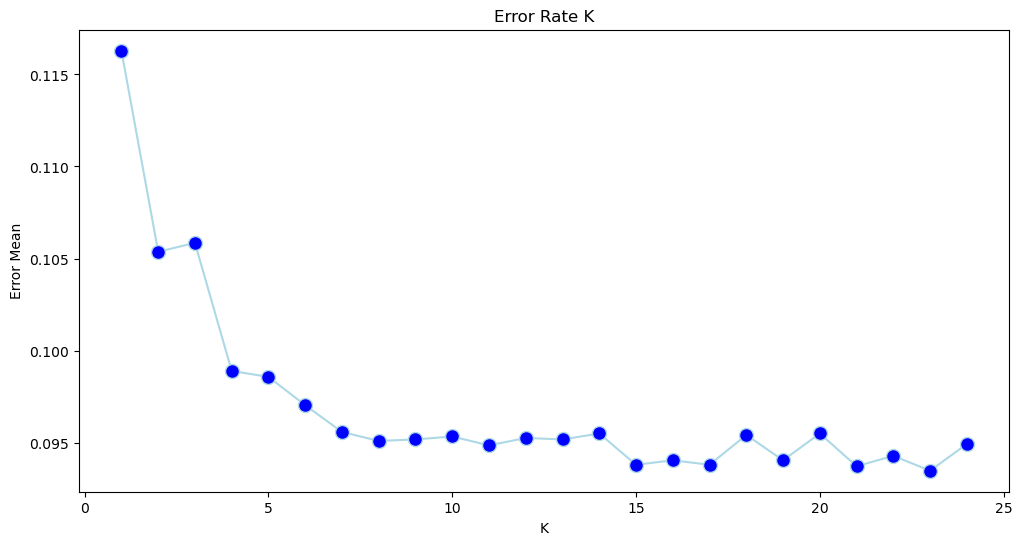

In [56]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), error, color='lightblue', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error Mean')

Berdasarkan plot, terlihat bahwa error yang paling kecil berada pada K = 23. 

### Generating Model K = 23

Digunakan fungsi `KNeighborsClassifier` dengan argumen `(n_neigbors=23)` yaitu banyaknya tetangga yang digunakan sebesar 23 untuk membangun model kembali. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data testing menggunakan fungsi `.predict()`.

In [57]:
knn_23 = KNeighborsClassifier(n_neighbors=23)
knn_23.fit(X_train,y_train)

y_pred_23 = knn_23.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy Model with K = 23

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [58]:
print('Accuracy:', accuracy_score(y_test,y_pred_23))

Accuracy: 0.9065307113377034


Didapatkan tingkat akurasi model dengan K = 23 sebesar 0.9065307113377034. Dibandingkan dengan model K = 9, terdapat kenaikan nilai akurasi pada model dengan K = 23 sebesar 0.002.

### Predict The Response for Train and Test Set

Dilakukan prediksi pada set data training dan data testing menggunakan fungsi `.predict()`

In [59]:
y_pred_train_23 = knn_23.predict(X_train)
y_pred_test_23 = knn_23.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

### Confusion Matrix
Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()`

In [60]:
cm_knn = confusion_matrix(y_test,y_pred_test_23)
cm_knn

array([[10722,   247],
       [  908,   480]], dtype=int64)

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10722
- False negative (salah memprediksi negatif) : 908
- False postive (salah memprediksi positif) : 247
- True postive (benar memprediksi positif) : 480

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [61]:
print('Classification Report Train Set: \n',classification_report(y_train,y_pred_train_23))
print('Classification Report Test Set: \n',classification_report(y_test,y_pred_test_23))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     25579
           1       0.69      0.36      0.48      3252

    accuracy                           0.91     28831
   macro avg       0.81      0.67      0.71     28831
weighted avg       0.90      0.91      0.90     28831

Classification Report Test Set: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.66      0.35      0.45      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



Tingkat akurasi model berdasarkan data training sebesar 0.91, sedangkan tingkat akurasi model berdasarkan data testing juga bernilai 0.91. Maka, model dapat dikategorikan sebagai model well-fit.

## Support Vector Machine

Support Vector Machine (SVM) adalah suatu teknik supervised learning untuk melakukan prediksi, baik dalam kasus klasifikasi maupun regresi.

### Model Building

Untuk membangun model SVM, digunakan fungsi `SVC()` dengan argumen `kernel='linear'`. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data training dan testing menggunakan fungsi `predict()`.

In [62]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_train,y_train)
y_pred_train_svc = svc_model.predict(X_train)
y_pred_test_svc = svc_model.predict(X_test)

### Accuracy
Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [63]:
print('Accuracy Train Set:', accuracy_score(y_train,y_pred_train_svc))
print('Accuracy Test Set:', accuracy_score(y_test,y_pred_test_svc))

Accuracy Train Set: 0.9019458222052652
Accuracy Test Set: 0.898761835396941


Berdasarkan hasil tersebut didapatkan:

- Tingkat akurasi model berdasarkan data training sebesar 0.9019458222052652.
- Tingkat akurasi model berdasarkan data testing sebesar 0.898761835396941.

### Confusion Matrix
Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()`

In [64]:
cm_svc = confusion_matrix(y_test,y_pred_test_svc)
cm_svc

array([[10745,   224],
       [ 1027,   361]], dtype=int64)

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10745
- False negative (salah memprediksi negatif) : 1027
- False postive (salah memprediksi positif) : 224
- True postive (benar memprediksi positif) : 361

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [65]:
print('Classification Report Train Set: \n', classification_report(y_train,y_pred_train_svc))
print('Classification Report Test Set: \n', classification_report(y_test,y_pred_test_svc))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     25579
           1       0.65      0.28      0.39      3252

    accuracy                           0.90     28831
   macro avg       0.78      0.63      0.67     28831
weighted avg       0.89      0.90      0.88     28831

Classification Report Test Set: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     10969
           1       0.62      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



Tingkat akurasi model berdasarkan data training sebesar 0.90, sedangkan tingkat akurasi model berdasarkan data testing juga bernilai 0.90. Maka, model dapat dikategorikan sebagai model well-fit.

## Decision Tree

Decision Tree atau pohon keputusan adalah alogritma supervised learning yang dapat digunakan untuk memprediksi dengan cara membangun klasifikasi atau regresi dalam bentuk struktur pohon.

### Model Building

Untuk membangun model Decision Tree, digunakan fungsi `DecisionTreeClassifier()` dengan argumen `max_depth=3` yaitu kedalaman decision tree sebesar 3. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data training dan testing menggunakan fungsi `predict()`.

In [66]:
dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X_train, y_train)

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

### Accuracy

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [67]:
print('Accuracy Train Set:', accuracy_score(y_train,y_pred_train_dtc))
print('Accuracy Test Set:', accuracy_score(y_test,y_pred_test_dtc))

Accuracy Train Set: 0.9070791855988346
Accuracy Test Set: 0.9103342235170349


Berdasarkan hasil tersebut didapatkan:

- Tingkat akurasi model berdasarkan data training sebesar 0.9070791855988346.
- Tingkat akurasi model berdasarkan data testing sebesar 0.9103342235170349.

### Confusion Matrix
Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()`

In [68]:
cm_dtc = confusion_matrix(y_test,y_pred_test_dtc)
cm_dtc

array([[10417,   552],
       [  556,   832]], dtype=int64)

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10417
- False negative (salah memprediksi negatif) : 556
- False postive (salah memprediksi positif) : 552
- True postive (benar memprediksi positif) : 832

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [69]:
print('Classification Train Set: \n', classification_report(y_train,y_pred_train_dtc))
print('Classification Test Set: \n', classification_report(y_test,y_pred_test_dtc))

Classification Train Set: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     25579
           1       0.59      0.59      0.59      3252

    accuracy                           0.91     28831
   macro avg       0.77      0.77      0.77     28831
weighted avg       0.91      0.91      0.91     28831

Classification Test Set: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     10969
           1       0.60      0.60      0.60      1388

    accuracy                           0.91     12357
   macro avg       0.78      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357



Tingkat akurasi model berdasarkan data training sebesar 0.91, sedangkan tingkat akurasi model berdasarkan data testing juga bernilai 0.91. Maka, model dapat dikategorikan sebagai model well-fit.

### Decision Tree Visualization

Visualisasi decision tree dapat dilakukan menggunakan argumen berikut.

In [70]:
feature_cols = list(df[df.columns[:-1]])

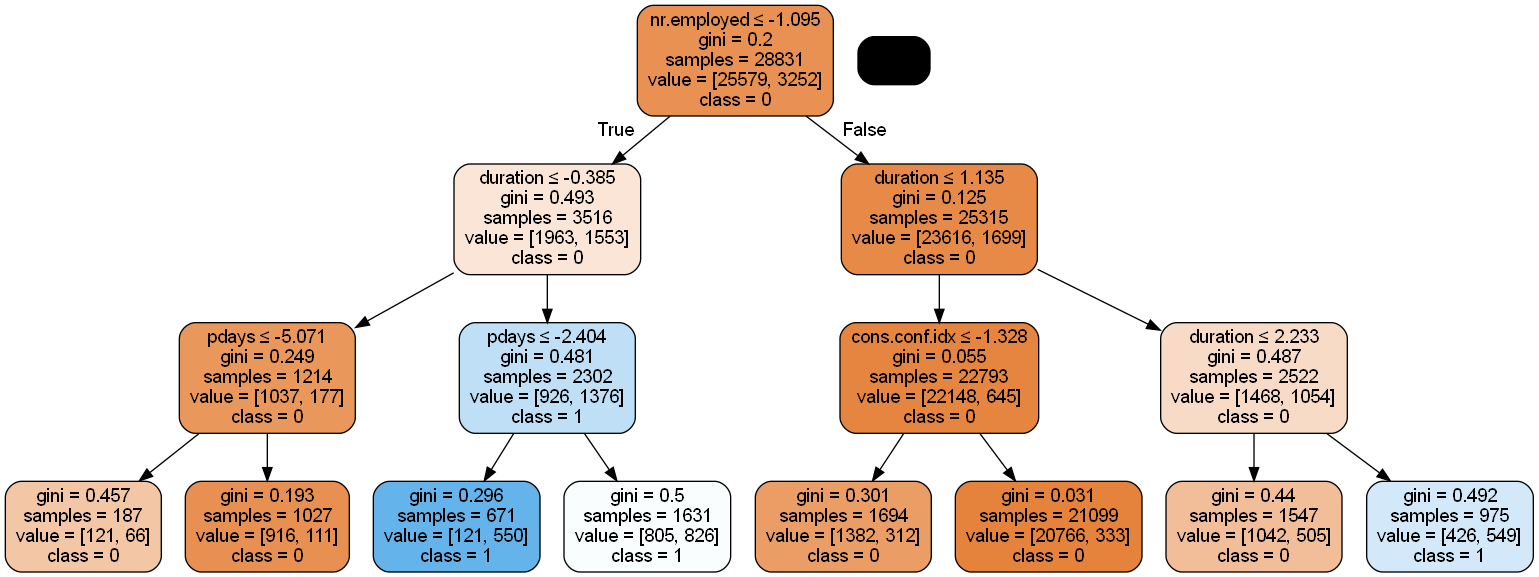

In [71]:
dot_data = StringIO()

tree.export_graphviz(dtc,out_file=dot_data,
                    class_names=['0','1'],
                    feature_names=feature_cols,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

Random forest merupakan salah satu metode pada algoritma decision tree. Random forest merupakan kombinasi dari masing-masing tree yang baik yang dikombinasikan dalam sebuah model.

### Model Building

Untuk membangun model Random Forest, digunakan fungsi `RandomForestClassifier()` dengan argumen `n_estimators=100`. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data training dan testing menggunakan fungsi `predict()`.

In [72]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

### Accuracy

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [73]:
print('Accuracy Train Set:', accuracy_score(y_train,y_pred_train_rfc))
print('Accuracy Test Set:', accuracy_score(y_test,y_pred_test_rfc))

Accuracy Train Set: 1.0
Accuracy Test Set: 0.917131989965202


Berdasarkan hasil tersebut didapatkan:

- Tingkat akurasi model berdasarkan data training sebesar 1.0.
- Tingkat akurasi model berdasarkan data testing sebesar 0.9175366189204499.

### Confusion Matrix
Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()`

In [74]:
cm_rfc = confusion_matrix(y_test,y_pred_test_rfc)
cm_rfc

array([[10625,   344],
       [  680,   708]], dtype=int64)

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 10642
- False negative (salah memprediksi negatif) : 692
- False postive (salah memprediksi positif) : 327
- True postive (benar memprediksi positif) : 696

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [75]:
print('Classification Report Train Set: \n', classification_report(y_train,y_pred_train_rfc))
print('Classification Report Test Set: \n', classification_report(y_test,y_pred_test_rfc))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25579
           1       1.00      1.00      1.00      3252

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Classification Report Test Set: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10969
           1       0.67      0.51      0.58      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



Tingkat akurasi model berdasarkan data training sebesar 1.0, sedangkan tingkat akurasi model berdasarkan data testing bernilai 0.92. Nilai akurasi pada set data training lebih tinggi dari nilai akurasi pada set data testing. Maka, model dapat dikategorikan sebagai model overfitting.

### Random Forest Visualization

Visualisasi random forest dapat dilakukan menggunakan argumen berikut dan diurutkan dari nilai terbesar ke terkecil.

In [76]:
f_i = rfc.feature_importances_
feature_imp = pd.Series(f_i,index=feature_cols)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

duration          0.313016
euribor3m         0.119639
age               0.091497
nr.employed       0.057711
job               0.048853
education         0.043782
campaign          0.041801
day_of_week       0.040815
pdays             0.033939
poutcome          0.027109
cons.conf.idx     0.026959
emp.var.rate      0.024764
marital           0.023493
cons.price.idx    0.021656
housing           0.020339
month             0.018005
loan              0.015050
previous          0.012917
contact           0.009888
default           0.008767
dtype: float64

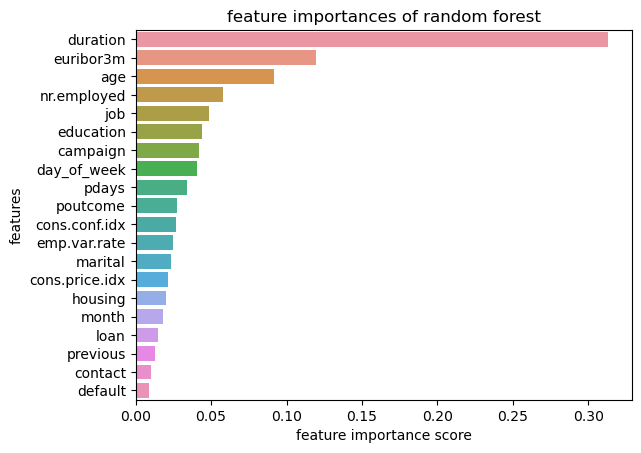

In [77]:
sns.barplot(x=feature_imp,y=feature_imp.index)

plt.title('feature importances of random forest')
plt.ylabel('features')
plt.xlabel('feature importance score')
plt.show()

Pada plot, dapat dilihat bahwa beberapa fitur tingkat kepentingannya sangat rendah. Apabila dilakukan analisis lanjutan, fitur-fitur tersebut dapat dihilangkan agar model yang didapat dan hasil prediksi lebih akurat.

## Naive Bayes

Naive Bayes adalah salah satu dari algoritma supervised learning yang metode pengklasifikasiannya didasarkan pada probabilitas/peluang. 

### Model Building

Untuk membangun model Naive Bayes, digunakan fungsi `Gaussian NB()`. Training model menggunakan fungsi `.fit()` dan melakukan prediksi pada set data training dan testing menggunakan fungsi `predict()`.

In [78]:
modelNB = GaussianNB()

modelNB.fit(X_train,y_train)

y_pred_test_nb = modelNB.predict(X_test)
y_pred_train_nb = modelNB.predict(X_train)

### Accuracy

Untuk mengukur tingkat akurasi model, digunakan fungsi `accuracy_score()`

In [79]:
print('Train Set Accuracy:', accuracy_score(y_train, y_pred_train_nb))
print('Test Set Accuracy:',accuracy_score(y_test,y_pred_test_nb))

Train Set Accuracy: 0.845340085324824
Test Set Accuracy: 0.8477785870356883


Berdasarkan hasil tersebut didapatkan:

- Tingkat akurasi model berdasarkan data training sebesar 0.845340085324824.
- Tingkat akurasi model berdasarkan data testing sebesar 0.8477785870356883.

### Confusion Matrix
Untuk memperoleh matriks konfusi, digunakan fungsi `confusion_matrix()`

In [80]:
cm_nb = confusion_matrix(y_test,y_pred_test_nb)
cm_nb

array([[9635, 1334],
       [ 547,  841]], dtype=int64)

Diperoleh hasil sebagai berikut:

- True negative (benar memprediksi negatif) : 9635
- False negative (salah memprediksi negatif) : 547
- False postive (salah memprediksi positif) : 1334
- True postive (benar memprediksi positif) : 841

Pada algoritma naive bayes, nilai false positive lebih besar daripada nilai true positive. Hal ini berarti kesalahan model memprediksi nilai true lebih besar. Perlu dilakukan improve model agar hasil prediksi yang didapatkan akurat.

### Classification Report

Untuk memperoleh hasil yang lebih komprehensif mengenai klasifikasi, dapat digunakan fungsi `classification_report`.

In [81]:
print('Classification Report Train Set: \n', classification_report(y_train,y_pred_train_nb))
print('Classification report Test Set: \n', classification_report(y_test,y_pred_test_nb))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     25579
           1       0.38      0.59      0.46      3252

    accuracy                           0.85     28831
   macro avg       0.66      0.74      0.69     28831
weighted avg       0.88      0.85      0.86     28831

Classification report Test Set: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     10969
           1       0.39      0.61      0.47      1388

    accuracy                           0.85     12357
   macro avg       0.67      0.74      0.69     12357
weighted avg       0.88      0.85      0.86     12357



Tingkat akurasi model berdasarkan data training sebesar 0.85, sedangkan tingkat akurasi model berdasarkan data testing bernilai 0.85. Nilai akurasi pada set data training sama dengan nilai akurasi pada set data testing. Maka, model dapat dikategorikan sebagai model well-fit.

## Summary

In [82]:
print("Logistic Regression:", accuracy_score(y_test, y_pred_test_lr))
print("K-NN:", accuracy_score(y_test, y_pred_test_23))
print("SVM:", accuracy_score(y_test, y_pred_test_svc))
print("Decision Tree:", accuracy_score(y_test, y_pred_test_dtc))
print("Random Forest:", accuracy_score(y_test, y_pred_test_rfc))
print("Naive Bayes:", accuracy_score(y_test, y_pred_test_nb))

Logistic Regression: 0.9122764425022255
K-NN: 0.9065307113377034
SVM: 0.898761835396941
Decision Tree: 0.9103342235170349
Random Forest: 0.917131989965202
Naive Bayes: 0.8477785870356883


Berdasarkan 6 algoritma, diperoleh nilai akurasi yang paling tinggi pada algoritma Random Forest. Namun, perlu diketahui bahwa model Random Forest adalah model yang overfitting. Model yang memiliki akurasi tinggi dan tidak overfitting atau underfitting adalah model Logistic Regression. Sehingga dapat disimpulkan bahwa algoritma Logistic Regression tepat digunakan untuk memprediksi klien yang akan berlangganan produk bank (deposito bank berjangka) di Portugis.